<a href="https://colab.research.google.com/github/ahsieh53632/music-attributes-and-popularity/blob/main/320_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team members
- Alex Hsieh
- Owen Luo
- Tyler Pavay


# Table of contents
- 1. [Introduction](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=rXBpbJaqqtdi)
- 2. [Data curation, parsing, and management](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=w0l-5g7Uq3A3)
  - 2.1 [imports](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=Udj15dj6DeKM)
  - 2.2 [loading the data](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=t3-jlDlqB-gc)
  - 2.3 [tidying up data](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=i5FDhZ0MIPHg)
- 3. [Data analysis](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=uqDGP06cs64M)
- 4. [Hypothesis testing and Machine Learning](https://colab.research.google.com/drive/1fUnYHoDNhK8WyN-sAWiiQBJQzhQBXZis#scrollTo=i5FDhZ0MIPHg)

#1. Introduction
Spotify is a product that has revolutionized and dominated the music listening market. With over 125 million subscribers, Spotify is the leader in the audio streaming market and thats not even considering all of the listeners who use the app for free. Listening to music is an activity that most Americans' take apart in everyday and it's important for musicians and artists to look at any trends and directions that listeners go to in order to compete in the growing competitive market.  Utilizing the data that Spotify offers, we are looking to create a regression of attrributes of songs that correlate with popularity. Our data will help others to consider the different factors that may impact the amount of streams that a given artist may receive. 

The Data that we collected had various attributes given to every song as referred from Spotify's developer page: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**duration_ms**: The duration of the track in milliseconds.

**key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**id**: The Spotify ID for the track.

**type**: The object type: “audio_features”

**popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.



#2. Data curation, parsing, and management

The first step in the data science pipeline is obtaining data and making sure that it is in a usuable form for analysis, visualization, and modeling.

##2.1 Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  - [seaborn](https://seaborn.pydata.org/index.html) 
    - a popular framework for ploting graphs
  - [matplotlib](https://matplotlib.org/index.html) 
    - similar to seaborn, another famous ploting library
  - [pandas](https://pandas.pydata.org/)
    - data analysis library
  - [numpy](https://numpy.org/)
    - powerful library to deal with n-dimensional matrices
    

##2.2 Loading in the Data
The data we will be using is the "Spotify Dataset 1920-2020, 160k+ Tracks" from 2020 which can be found [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks). The data is downloaded as a csv file which can be imported into our pipeline as a pandas dataframe.



In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

valence  year  acousticness  ... release_date  speechiness    tempo
0   0.0594  1921         0.982  ...         1921       0.0366   80.954
1   0.9630  1921         0.732  ...         1921       0.4150   60.936
2   0.0394  1921         0.961  ...         1921       0.0339  110.339
3   0.1650  1921         0.967  ...         1921       0.0354  100.109
4   0.2530  1921         0.957  ...         1921       0.0380  101.665

[5 rows x 19 columns]

##2.3 Tidy Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

The data is already decently clean and won't need much more tidying. However, there are some empty data entries that need to be cleaned. But when looking at how the "artists" are displayed in the dataset, they have apostrophes and brackets around them. Below we will remove the brackets and apostrophes from the artists. And we will also get rid of all the empty entries in the dataframe.  This will be down using the following code:

In [ ]:
# removing nulls
df = df.dropna()

df['artists'] = df['artists'].str.replace("'","")
df['artists'] = df['artists'].str.replace("[","")
df['artists'] = df['artists'].str.replace("]","")
df.head()

valence  year  acousticness  ... release_date  speechiness    tempo
0   0.0594  1921         0.982  ...         1921       0.0366   80.954
1   0.9630  1921         0.732  ...         1921       0.4150   60.936
2   0.0394  1921         0.961  ...         1921       0.0339  110.339
3   0.1650  1921         0.967  ...         1921       0.0354  100.109
4   0.2530  1921         0.957  ...         1921       0.0380  101.665

[5 rows x 19 columns]

#3. Data analysis


For our data analysis, we will take a deep dive into learning how to show patterns, correlations, and visualize our data to the common eye. Creating visually appealing statistics about our data is important because the raw csv file is a bit hard to understand, especially in the general scope. Through graphs and plots, we will be able to better understand our data and get a better overview of it.



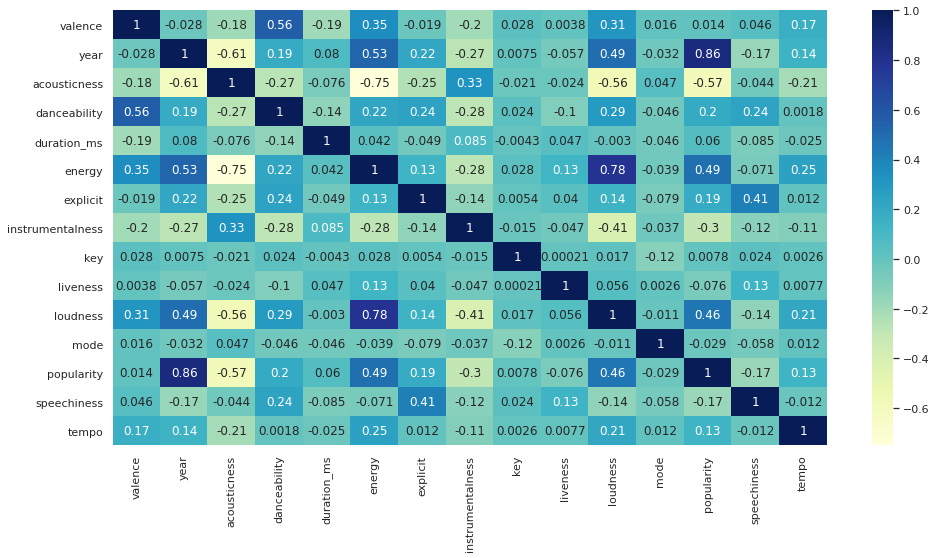

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

Looking at the correlation table, we can note a few observations on what attributes make a song more popular. 

* As expected, popularity is highly correlated with the year released. As the Spotify algorithm decides how popular a song is, it generates it's "popularity" metric by how recent the streams of the song are, not just the total number of streams the song has received. 
* Energy seems to play a factor in influencing a song's popularity with a .5 correlation ratio. Many popular songs are energetic, but may not necessarily be a good song to dance to. As the dancing correlation is not that high. However, if a song has low energy, that doesn't gaurantee it won't be a popular song.
* Looking at the correlation, we can see that acousticness is the least correlated with popularity, with a score of -0.59 which makes sense as popular songs recently have electric instruments or contain some remix influence in them. It is uncommon to find popular songs that are played by an orchestra or just pure acoustics compared to the vast majority.

Utilizing the correlation table, we can also note a few other observations about attributes.

* Loudness and energy are highly correlated
* Acousticness is negatively correlated with energy, loudness, and year. 
* Valence and dancability are highly correlated.

From this data, we can predict that an artist with a high energy song containing electric instruments has the best chance of gaining the most popularity. 

### Music attributes of songs over the years

Text(0.5, 0, 'Year')

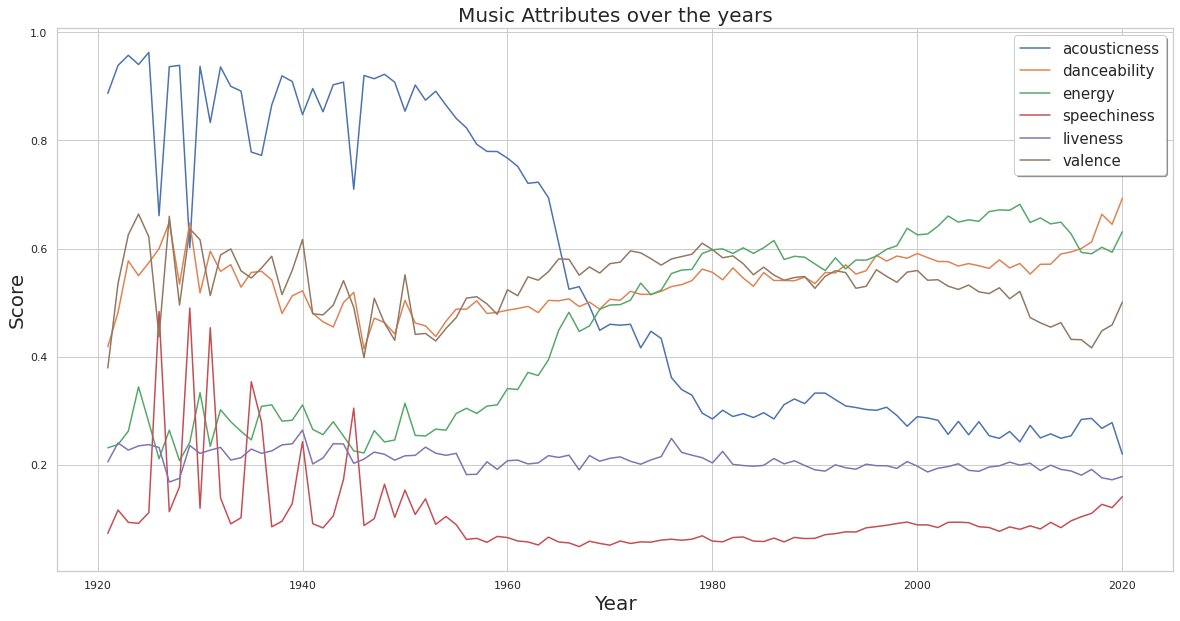

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = df.groupby("year")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Music Attributes over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper right')
ax.set_ylabel('Score', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

As you can see, prior to 1960s, main stream music had a high level of acousticness. However, after 1960, music started to become more energetic, and dancability rose. Naturally, as the level of energy rose, the level of acousticness became fell. We suspect this is the case because of the rise of two specific music genres: hip-hop and edm. EDM and hip-hop have risen to fame, and since most of these songs are hyped and energetic, they also show a drop in the level of acousticness, as well as an increase in energy level. Interestingly, danceability didn't increase as energy increase. This means that people found energetic music and acoustic music equally as easy to dance to.

* Other interesting things to note:
  - mean Dancibility has been almost the same for the past decade. This suggests that it is probabaly not correlated to acousticness or energy, since those two attributes increased/decreased significantly for the past decade
  - We can infer that energy is probably inversly related to acoustincess. As energy goes up, acoustincess goes down.
  - Speechiness varied a lot prior to the 1960s, but after 1960, the music market seemed to have a uniform score of speechiness over the year. We could proabably infer that people didn't like music with high speechiness, and that's why the mean score for it has been low (< 0.3) since 1960.
  - Valence has been slowly rising during the period from 1960 to 1980, but after that, especially after 2000, it dropped significantly

#### Loudness

Text(0.5, 0, 'Year')

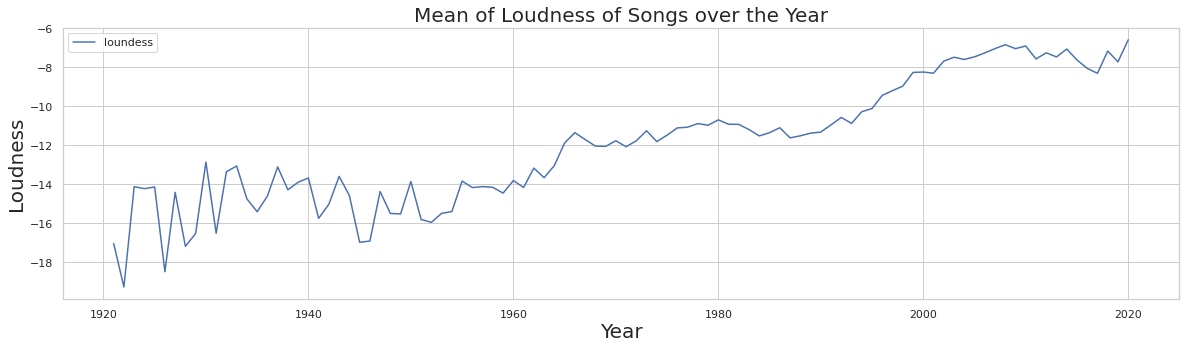

In [ ]:
plt.figure(figsize=(20, 5))
# mean loudness over year
x = df.groupby('year')["loudness"].mean()
ax = sns.lineplot(x= x.index, y=x, label="loundess")

# set axis label and titles 
ax.set_title('Mean of Loudness of Songs over the Year', fontsize = 20)
ax.set_ylabel('Loudness', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

As you can see, the mean loudness of music has been rising rapidly since right after the 1950s. This can also reflect people's music taste over time. With the grow of EDM and hip-hop music, people started to enjoy music that was "loud" and had "heavy bass" more, especially in the rap industry. This could also reflect the progress in recording technology, adding more layers or more audio effects often results in the increase in loudness too.

### Top 10 popular songs 



Text(0.5, 0, 'song title')

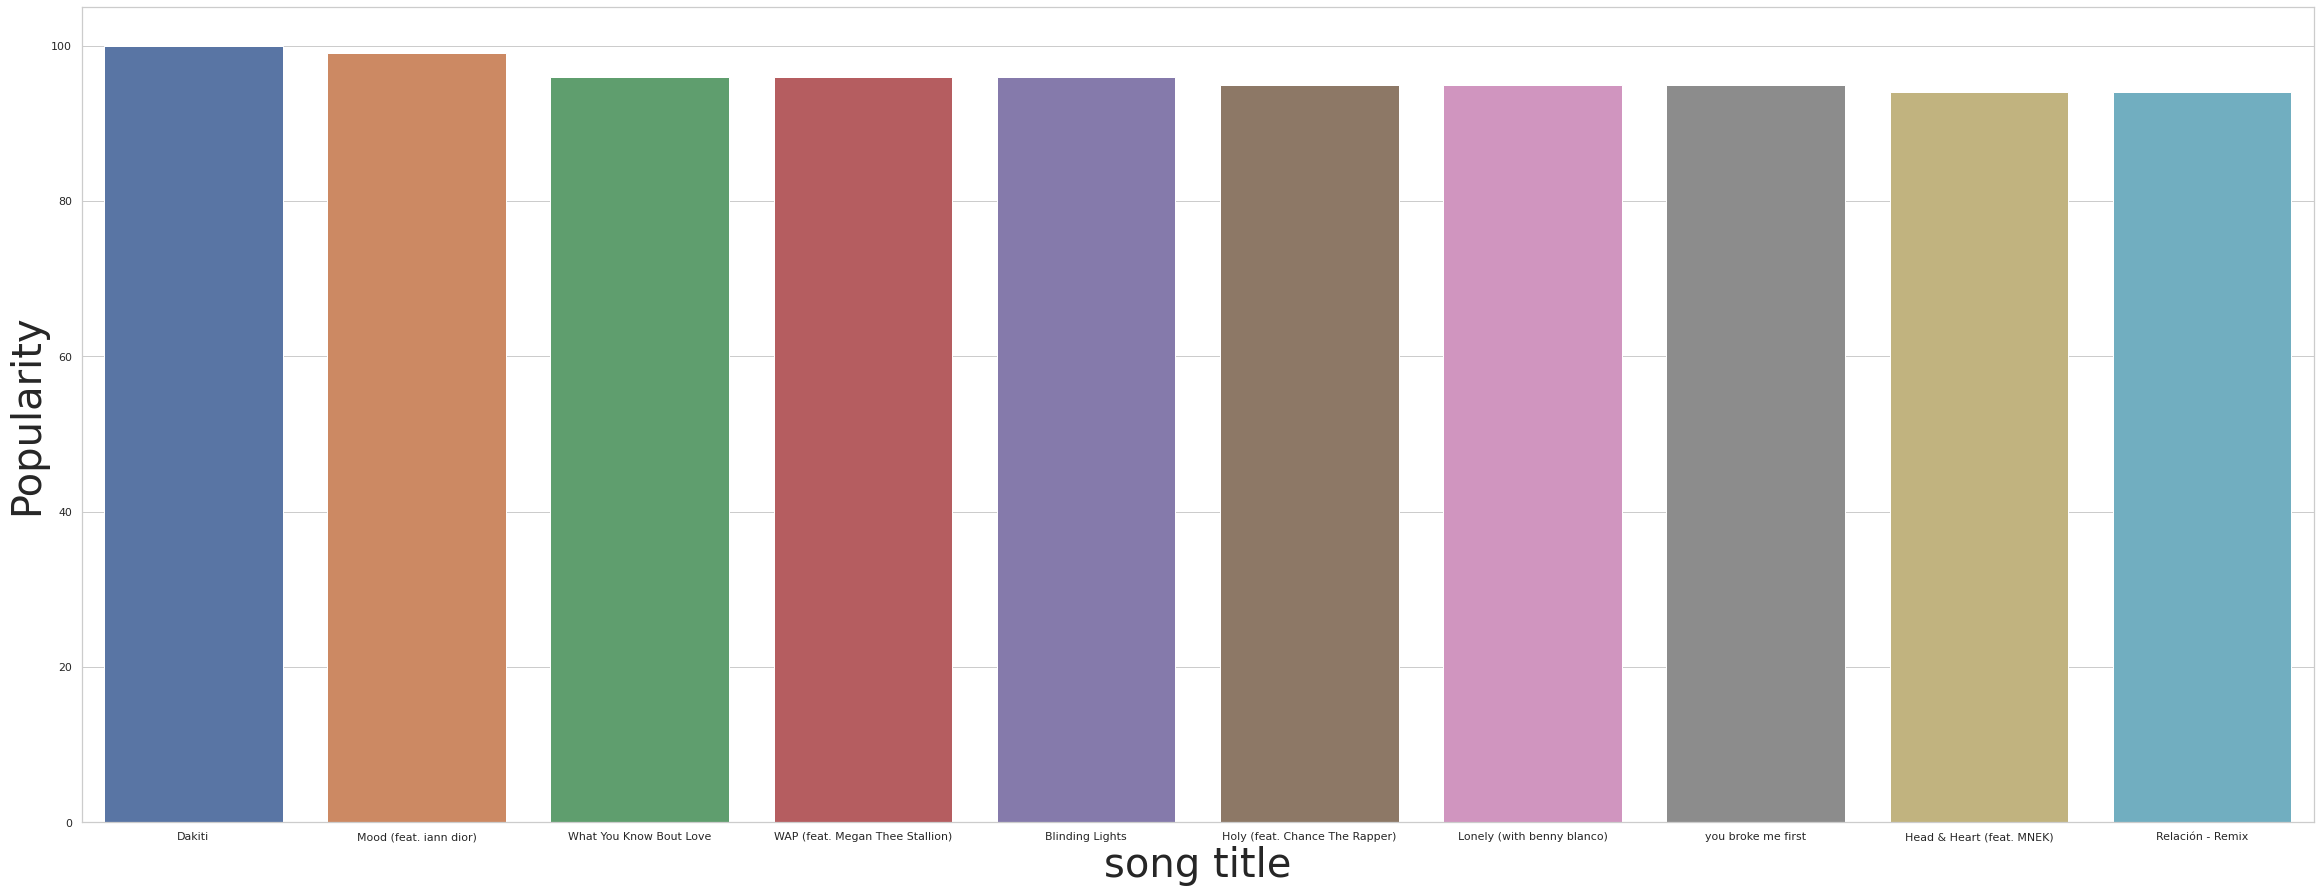

In [ ]:
plt.figure(figsize=(40, 15))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('Popularity', fontsize=40)
axis.set_xlabel('song title', fontsize=40)

As shown, it appears that most popular songs are either upbeat rap music, or have some sort of hip-hop elements in them. This reflects our statement about main stream music being more energetic and upbeat. It also displays the drop in level of acoutisness.

### Top 10 popular artists 

Text(0.5, 0, 'artist')

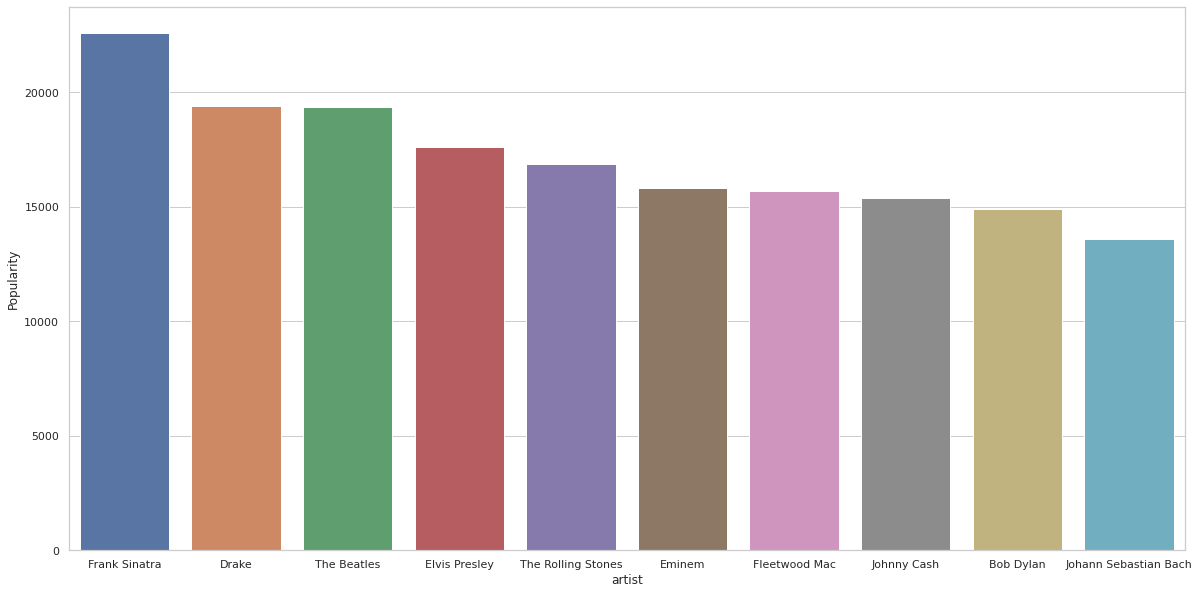

In [ ]:
from collections import Counter

artist_popularity_sum = Counter()

# since a song can have different artists, we add the popularity score to each 
# artists
for l in df[["artists", "popularity"]].to_numpy():
  artist_list = [x.strip() for x in l[0].split(',')]
  for artist in artist_list:
    artist_popularity_sum[artist] += float(l[1])


top_10_artist = artist_popularity_sum.most_common(10)
xs = [a[0] for a in top_10_artist]
ys = [a[1] for a in top_10_artist]

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
axis = sns.barplot(x=xs, y=ys)

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')

We can see that famous bands like The beatles and queens are rank at the top. We could also see that newer artists, such as taylor swift and enimem are also on top of the ranking. It is important to note that this dataset contains data starting from 1960s to 2020, that's why these older bands shows appearance on the chart 

#### Top 10 artists in 2020

Text(0.5, 0, 'artist')

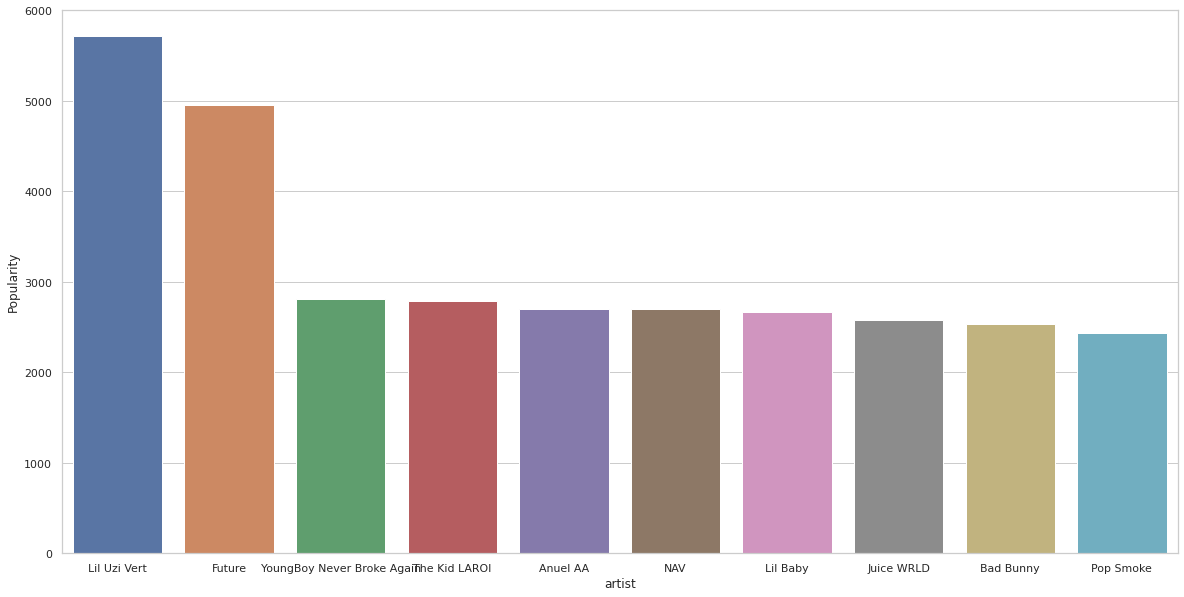

In [ ]:
data_2020 = df.loc[df['year'] == 2020]

artist_popularity_sum = Counter()

# since a song can have different artists, we add the popularity score to each 
# artists
for l in data_2020[["artists", "popularity"]].to_numpy():
  artist_list = [x.strip() for x in l[0].split(',')]
  for artist in artist_list:
    artist_popularity_sum[artist] += int(l[1])

top_10_artist = artist_popularity_sum.most_common(10)
xs = [a[0] for a in top_10_artist]
ys = [a[1] for a in top_10_artist]

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
axis = sns.barplot(x=xs, y=ys)

axis.set_ylabel('Popularity')
axis.set_xlabel('artist')

### relationship between year and popularity

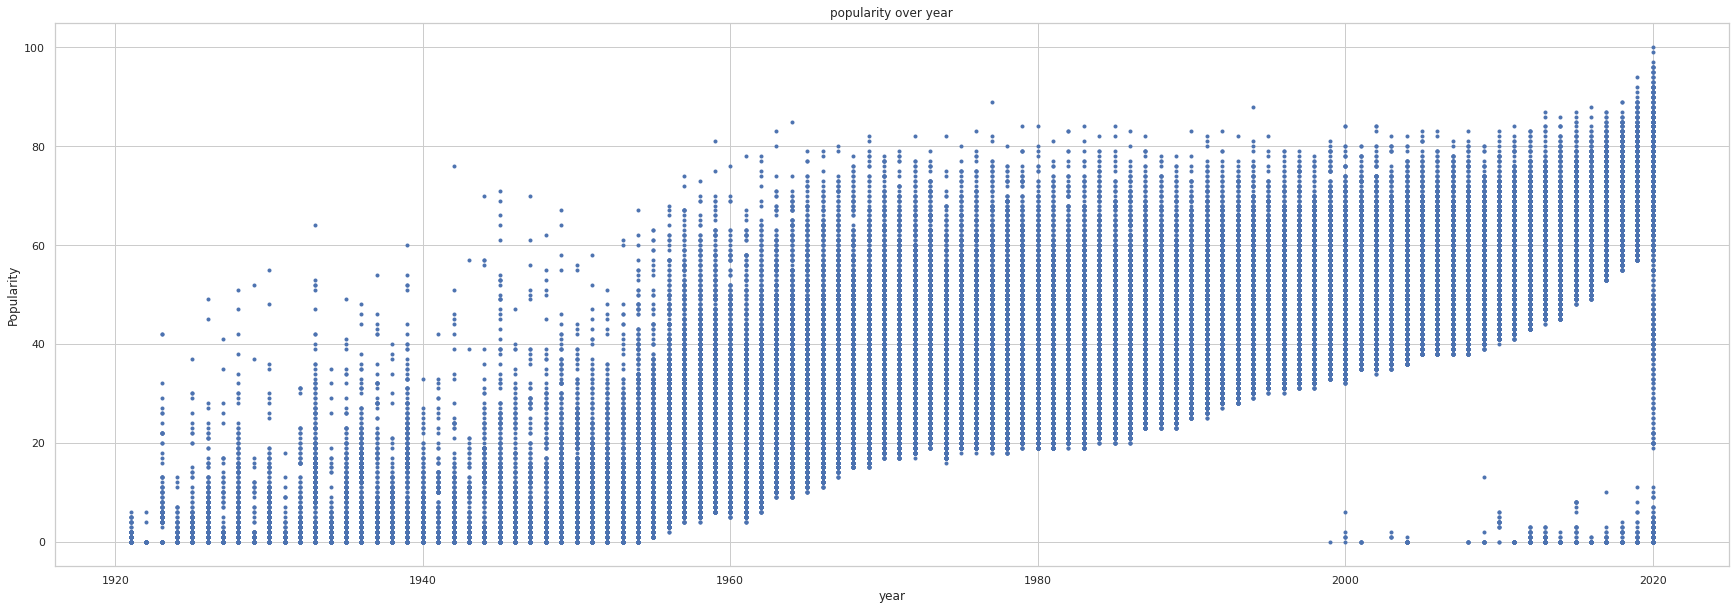

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["year"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('year')
plt.title("popularity over year")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean year for song popularity')

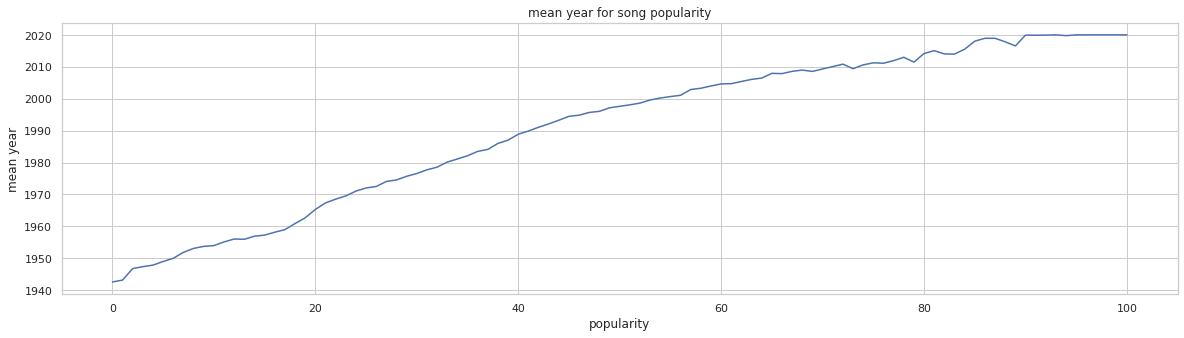

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["year"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean year')
axis.set_xlabel('popularity')
axis.set_title("mean year for song popularity")

We can see that a newly released song has a higher likelihood of being popular; which makes total sense. Newer songs have a higher chance of being heard, and the dataset also calculates popularity base on the current time of stream. So it is reasonable that people listens to newer songs.

### relationship between energy and popularity

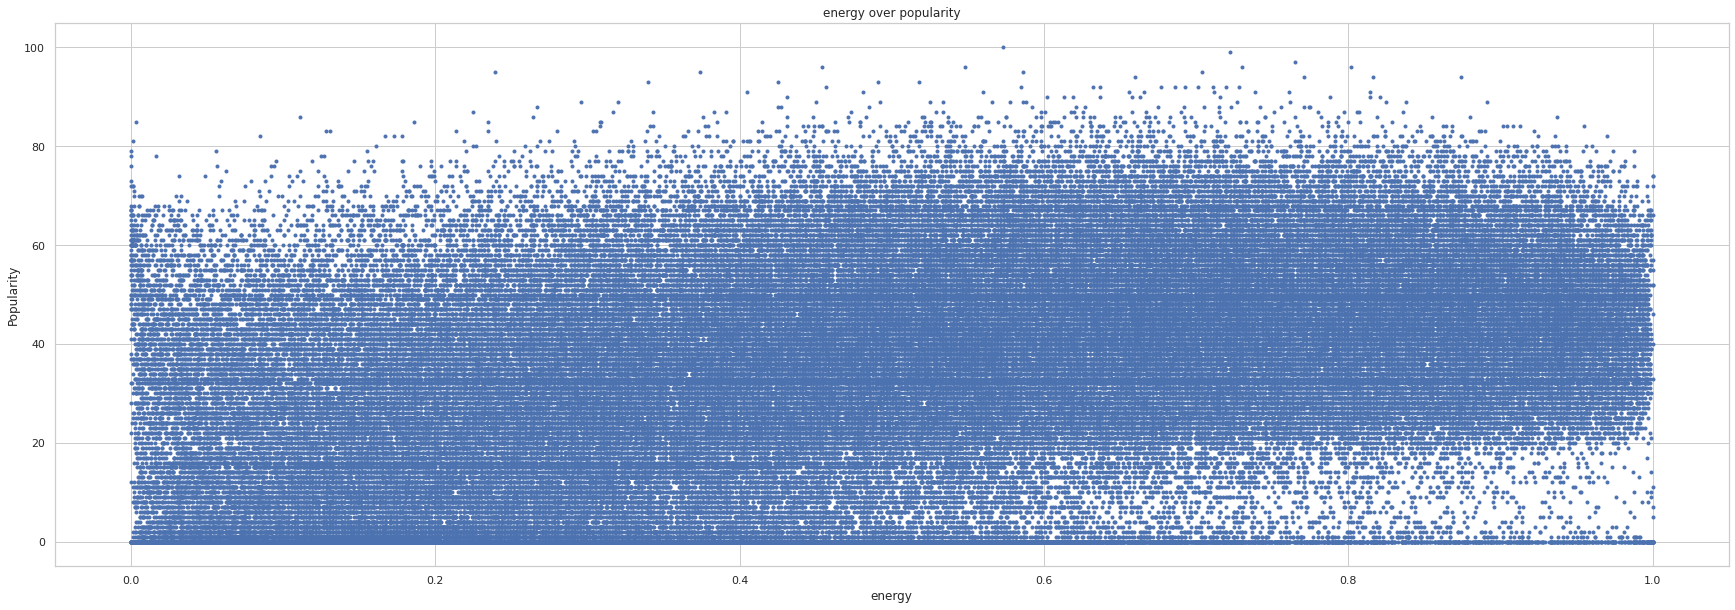

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["energy"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('energy')
plt.title("energy over popularity")
plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean energy for song popularity')

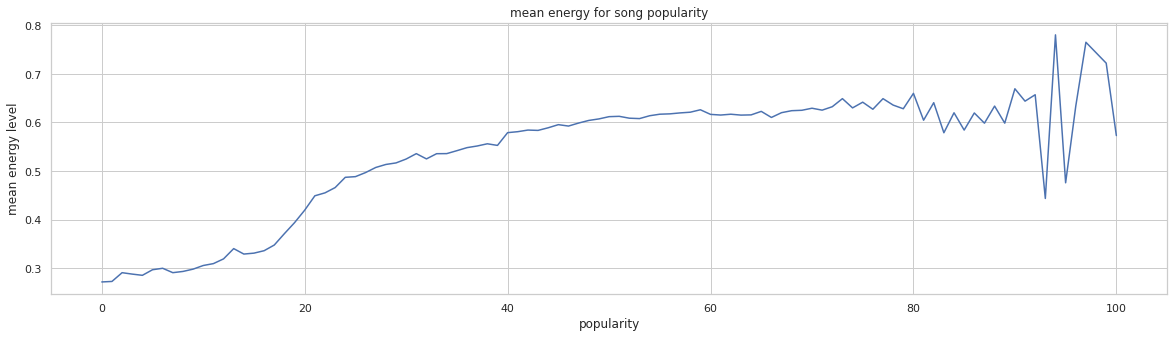

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["energy"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean energy level')
axis.set_xlabel('popularity')
axis.set_title("mean energy for song popularity")

When looking at the mean populatirty over energy score, it seems on average that more popular songs are typically more energetic. This is hard to see in the scatter plot, but it is pretty clear to see this trend in the plot above.

### relationship between livliness and popularity

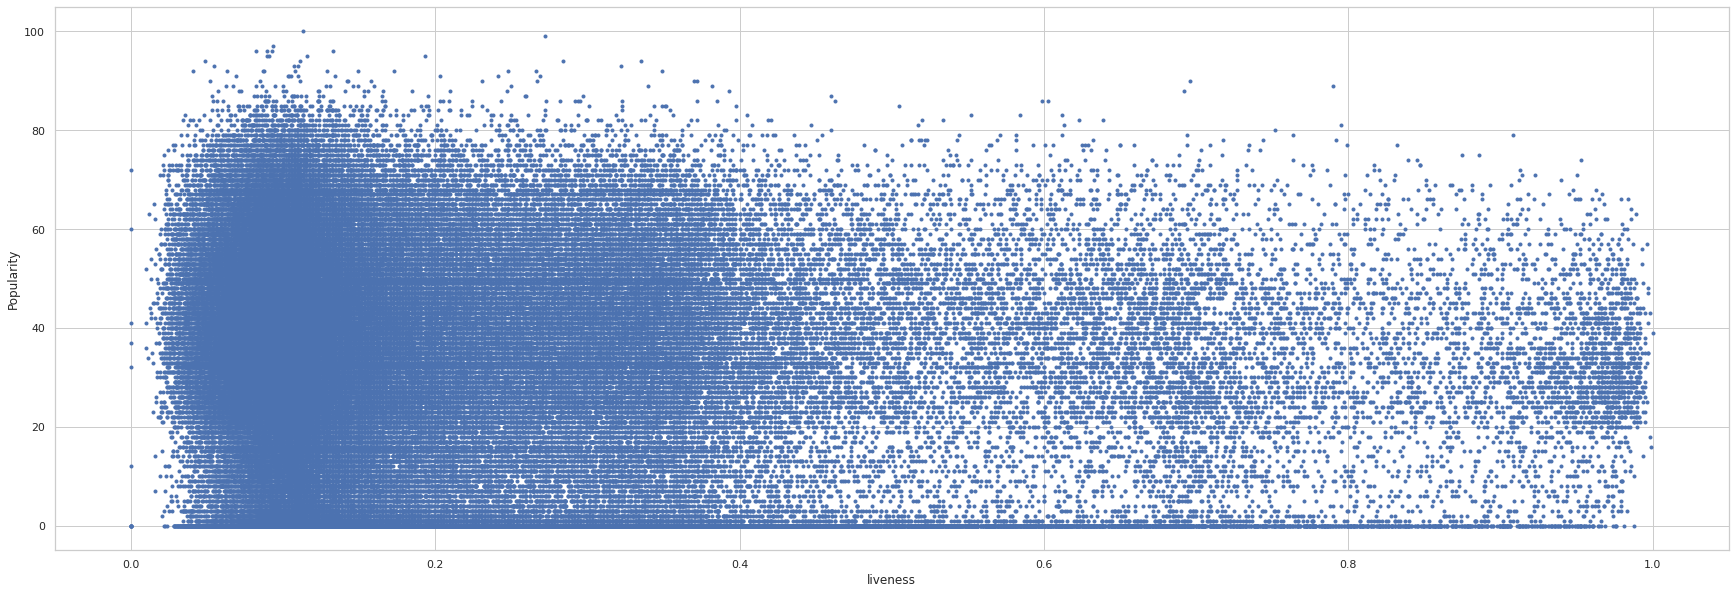

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["liveness"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('liveness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean livness for song popularity')

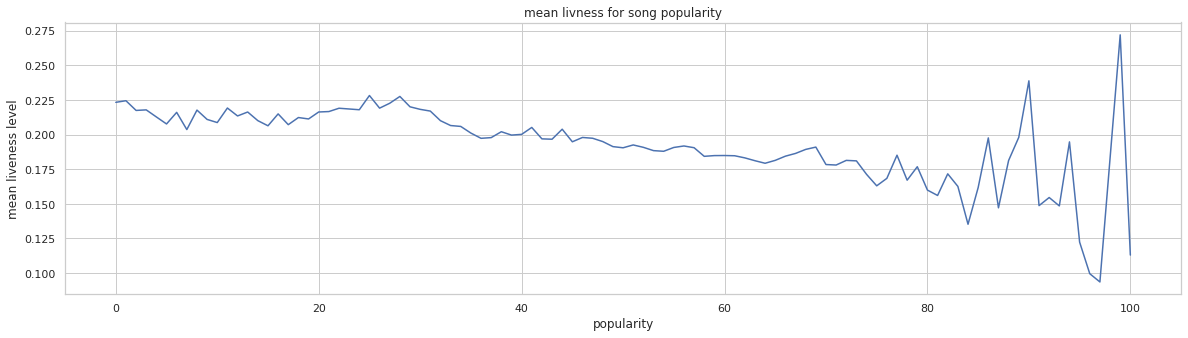

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["liveness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean liveness level')
axis.set_xlabel('popularity')
axis.set_title("mean livness for song popularity")

Based on these two plots, we can infer that the liveness doesn't affect popularity as much as energy. But, we did see a peak in liveness when popularity reaches about 95. This means that very popular songs tend to have higher liveness, but otherwise, it seems like it doesn't matter as much. Also, note the drop when popularity reaches 100. This is because there's only one song that has 100 popularity, wich is Dakiti, and has liveness of 0.113. Since there's only one song that has 100 popularity, it makes sense for us to ignore this row of data when analyzing this graph.

In [ ]:
df.loc[df["popularity"] == 100][["name", "year", "popularity", "liveness"]]

name  year  popularity  liveness
19611  Dakiti  2020         100     0.113

### relationship between acousticness and popularity

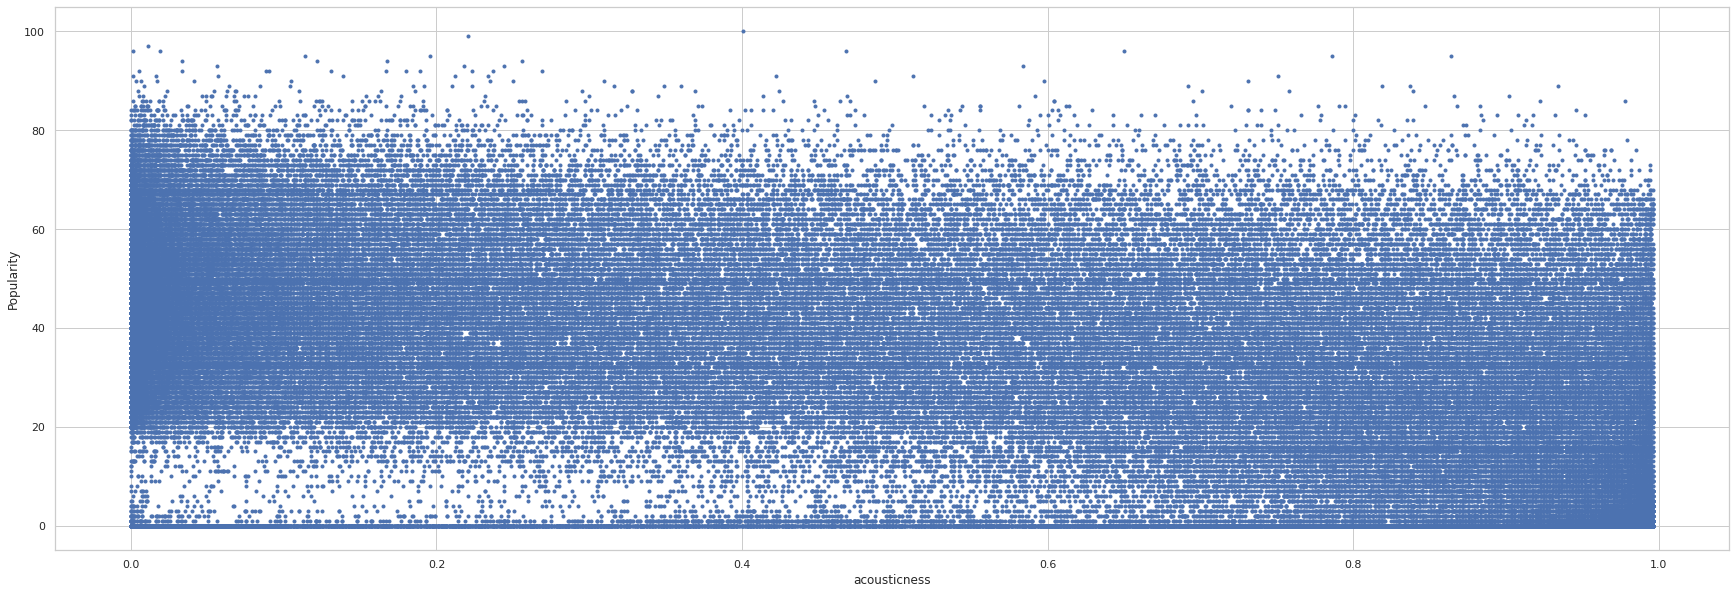

In [ ]:
plt.figure(figsize=(30, 10))

xs = df["acousticness"].to_numpy()
ys = df["popularity"].to_numpy()
plt.ylabel('Popularity')
plt.xlabel('acousticness')

plt.plot(xs, ys, '.')
plt.show()

Text(0.5, 1.0, 'mean acousticness for song popularity')

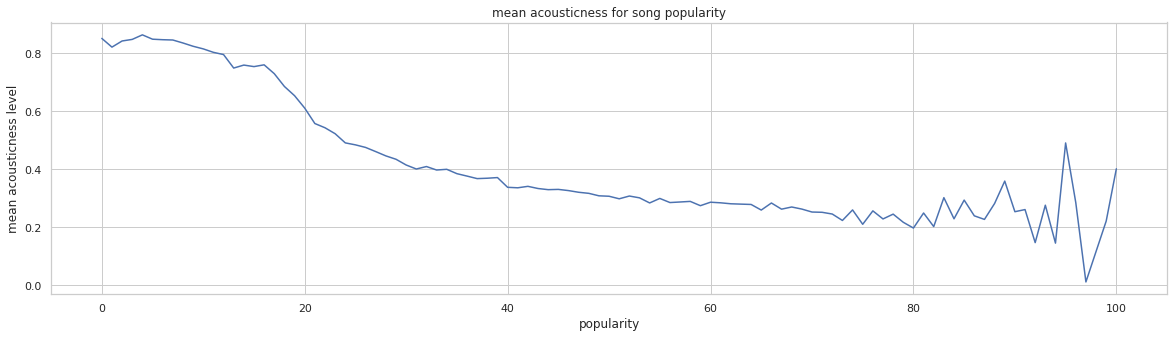

In [ ]:
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")

# group by the song's popularity and then get the mean energy
x = df.groupby("popularity")["acousticness"].mean()
axis = sns.lineplot(x=x.index, y=x)

axis.set_ylabel('mean acousticness level')
axis.set_xlabel('popularity')
axis.set_title("mean acousticness for song popularity")

It seems that more popular songs tend to have lower levels of acousticness. This makes sense considering main stream music is mostly EDM and hip-hop, which use mainly electrical music elements.

# Hypothesis and Machine Learning


Based on our analysis and the heatmap, we assume that music popularity has a positive correlation with energy, liveness, and the year. To back our claim, we can use machine learning algortihms, such as linear regression to fit a mathematical formula on the data and confirm if energy and liviness contributes to music popularity
  - if you want to know more about linear regression, you can check out this [link](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

### Imports

In [ ]:
import sklearn 

# preparing data
from sklearn.model_selection import train_test_split

# linear regression model
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso 

# Metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Linear regression on energy over popularity




In [ ]:
reg = LinearRegression()
df = df.dropna()
xs = df[["energy"]].to_numpy()

ys = df["popularity"].to_numpy()[:, np.newaxis]

reg.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

regression score

In [ ]:
reg.score(xs, ys)

0.23522988848905868

In [ ]:
reg.coef_, reg.intercept_

(array([[39.55235657]]), array([12.35217913]))

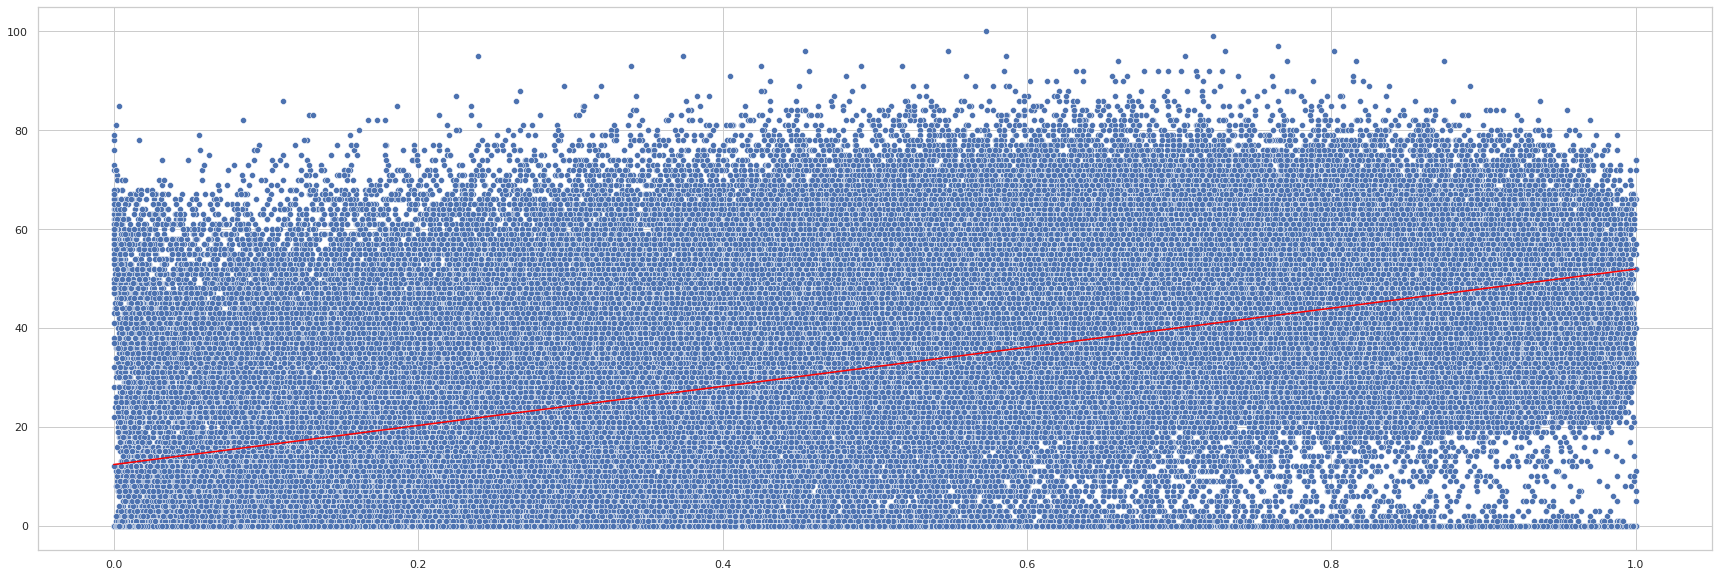

In [ ]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=[0, 1], y=reg.predict([[0], [1]]).squeeze(), color="red")
sns.scatterplot(x=df["energy"].to_numpy(), y=df["popularity"].to_numpy())

### Linear regression on liveness over popularity


In [ ]:
reg = LinearRegression()
df = df.dropna()
xs = df[["liveness"]].to_numpy()
ys = df["popularity"].to_numpy()[:, np.newaxis]

reg.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

regression score

In [ ]:
reg.score(xs, ys)

0.005846754746089644

In [ ]:
reg.coef_, reg.intercept_

(array([[-9.54752535]]), array([33.39704412]))

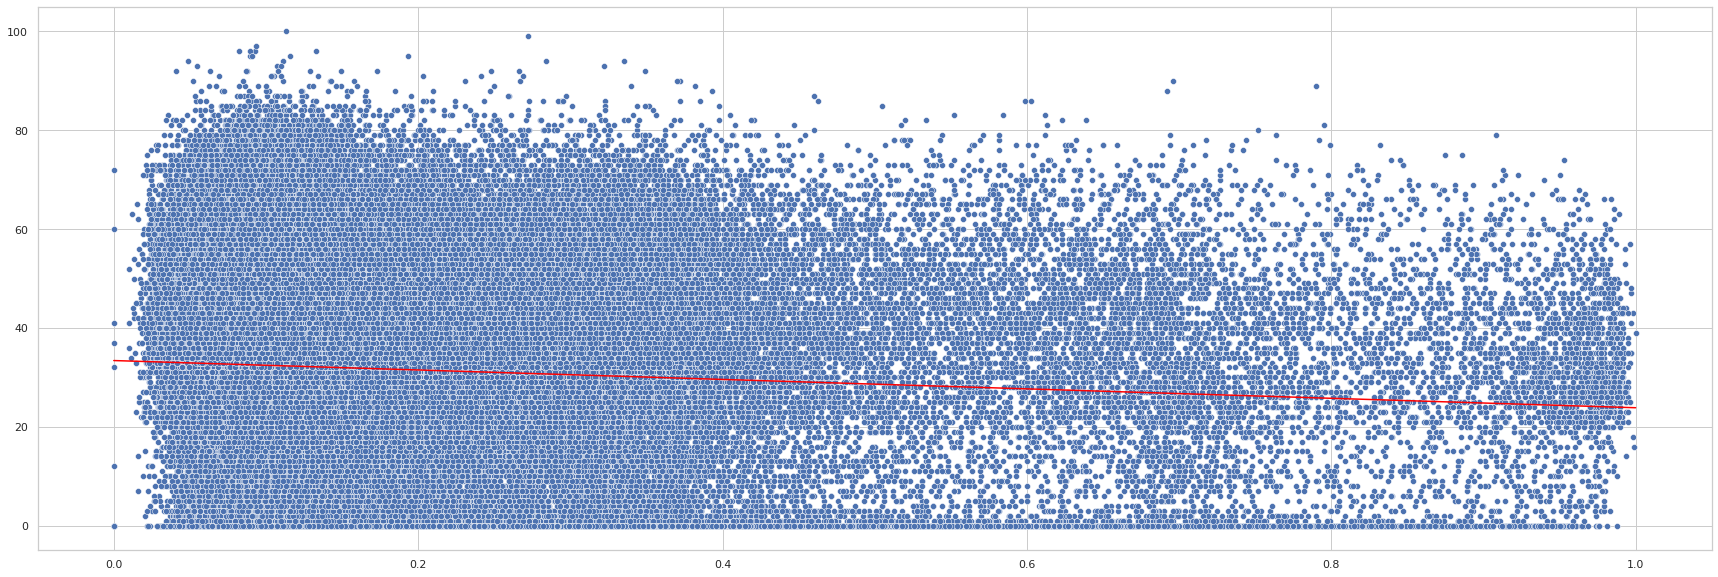

In [ ]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=[0, 1], y=reg.predict([[0], [1]]).squeeze(), color="red")
sns.scatterplot(x=df["liveness"].to_numpy(), y=df["popularity"].to_numpy())

### Linear regression on year over popularity


In [ ]:
reg = LinearRegression()
df = df.dropna()
xs = df[["year"]].to_numpy()
ys = df["popularity"].to_numpy()[:, np.newaxis]

reg.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

regression score

In [ ]:
reg.score(xs, ys)

0.7438062225211797

In [ ]:
reg.coef_, reg.intercept_

(array([[0.72630207]]), array([-1404.3128621]))

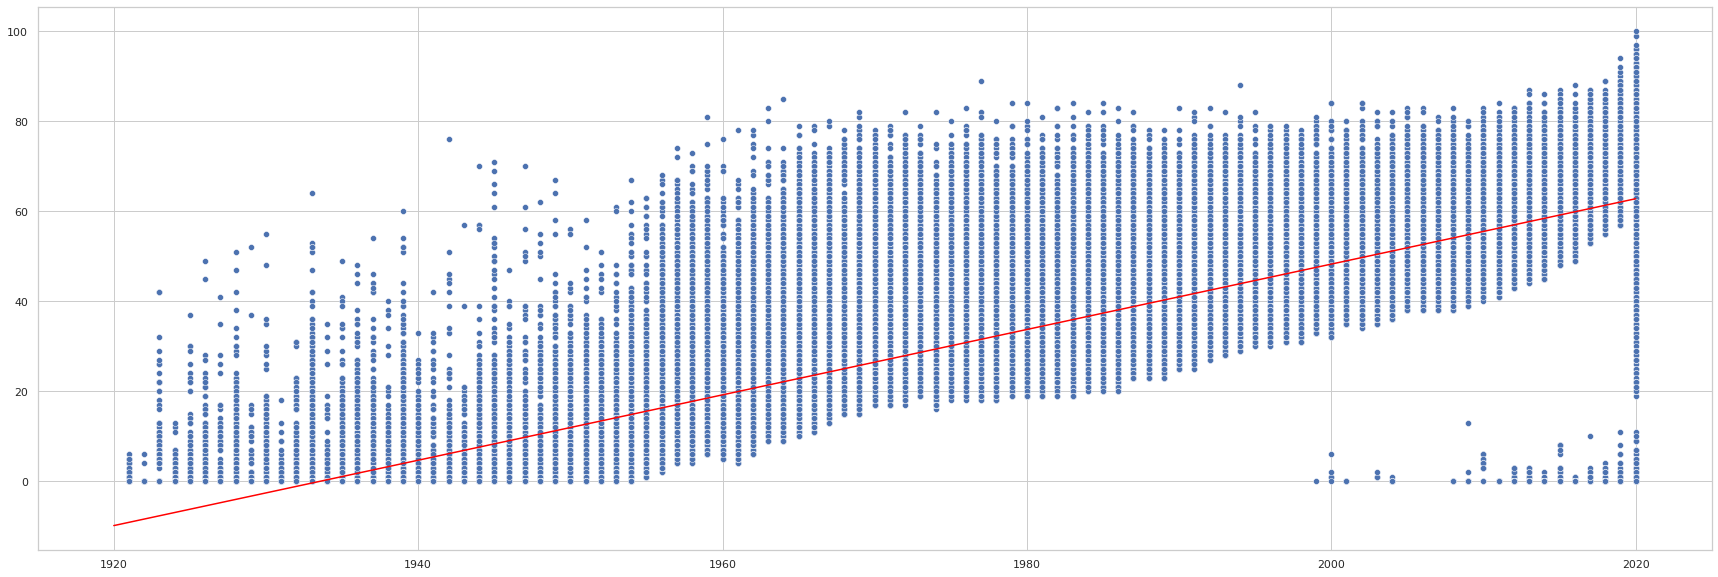

In [ ]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=[1920, 2020], y=reg.predict([[1920], [2020]]).squeeze(), color="red")
sns.scatterplot(x=df["year"].to_numpy(), y=df["popularity"].to_numpy())

### Conclusion

Base on the regression results, it seems like the year is still the main factor that determines a songs popularity. Although energy still has some effect, it is not quite obvious. When looking at the regression score between energy and popularity, we can definitely say that there has to be more to a song than just a high energy level for the song to be popular. Additionally, although very popular music has high liveness scores, it appears that liveness doesn't really have any effect on the popularity of a song. It just happened that most popular songs nowadays have high liveness.

Based on our results, we can tell that popular music doesn't age well. As time goes by, the popularity will most certainly decrease. We also learned that audio attributes of a song doesn't greatly affect a songs popularity. If anything, only energy of a song can make it more popular. But not by much. We can infer that maybe the emotional attachment, the lyrics and background story, or maybe even the artist is what makes the song popular, not the attributes